In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from itertools import combinations
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import decimal

In [54]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)

In [55]:
df = df.rename(columns={0:"sepal length (cm)", 1:"sepal width (cm)", 2:"petal length (cm)", 3:"petal width (cm)", 4:"class"})
df.columns = df.columns.str.replace(' ', '_')

In [56]:
df.head()

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### The y-labels are strings. We will need to turn them into numerical values for calculating the loss function in our model. LabelEncoder is a function that turnes string labels into numbers.


In [57]:
# creating instance of labelencoder
labelencoder = LabelEncoder()# Assigning numerical values and storing in another column
df['class'] = labelencoder.fit_transform(df['class'])

df['class'] #Encoder turned 3 classes into either- 0,1,2. 

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: class, Length: 150, dtype: int32

In [58]:
features = df.columns[0:len(df.columns)-1]
for f in features:
    print(f)

sepal_length_(cm)
sepal_width_(cm)
petal_length_(cm)
petal_width_(cm)


#### Making a python dictionary to save model accuracy scores

In [59]:
def make_dict():
    answer_dict = {
        "Model Type": ['AB', 'AC', 'AD', 'BC', 'BD', 'CD'],
        "SGD Classifier":[],
        "Logistic Regression":[],
        "SVM- Linear":[],
        "SVM- Polynomial":[],
        "SVM- RBF":[]
    }
    return answer_dict

### To get all 6 possible combinations with the two features, we will use itertools.combinations function

In [60]:
#get combinations of all features
def getFeatureCombination(features):
    feature_combination = list()
    
    feature_combination+=(list(combinations(features, 2)))    
    return feature_combination

ans = getFeatureCombination(features)
for a in ans:
    print(list(a))

['sepal_length_(cm)', 'sepal_width_(cm)']
['sepal_length_(cm)', 'petal_length_(cm)']
['sepal_length_(cm)', 'petal_width_(cm)']
['sepal_width_(cm)', 'petal_length_(cm)']
['sepal_width_(cm)', 'petal_width_(cm)']
['petal_length_(cm)', 'petal_width_(cm)']


## Stochastic Gradient Descent

In [61]:
def train_sgd(X_train, y_train):
    sgd_model = SGDClassifier(loss='modified_huber', learning_rate='optimal', eta0=0.01, max_iter=2000, random_state=40)
    sgd_model.fit(X_train,y_train)
    accuracy = round(sgd_model.score(X_train, y_train),2)
    answer_dict['SGD Classifier'].append(accuracy)

## Logistic Regression

In [62]:
def train_logistic(X_train, y_train):
    logisticRegr_model = LogisticRegression(random_state=30)
    logisticRegr_model.fit(X_train,y_train)
    accuracy = round(logisticRegr_model.score(X_train, y_train),2)
    answer_dict['Logistic Regression'].append(accuracy)

## SVM

In [63]:
def train_SVM_lin(X_train, y_train, sel_kernel, dict_key):
    SVM_model = SVC(kernel=sel_kernel, random_state=30)
    SVM_model.fit(X_train, y_train)
    accuracy = round(SVM_model.score(X_train, y_train),2)
    answer_dict[dict_key].append(accuracy)
    
def train_SVM_poly(X_train, y_train, sel_kernel, dict_key):
    SVM_model = SVC(kernel=sel_kernel, random_state=30, degree=3)
    SVM_model.fit(X_train, y_train)
    accuracy = round(SVM_model.score(X_train, y_train),2)
    answer_dict[dict_key].append(accuracy)

def train_SVM_rbf(X_train, y_train, sel_kernel, dict_key):
    SVM_model = SVC(kernel=sel_kernel, random_state=30, gamma=0.7)
    SVM_model.fit(X_train, y_train)
    accuracy = round(SVM_model.score(X_train, y_train),2)
    answer_dict[dict_key].append(accuracy)

Here, we are using three different functions to fine tune the Hyperparameters for each SVM models in the hope of getting better result. For example: in Polynimial Kernel, I used different degrees(i.e: 2,3) to see if I get a better result. After tranning with degrees 2, 3 the accuracy score remained unchanged. Meaning that the higher degree didn't improve the accuracy. We will see the desicion boundery graph for degree 2 and 3 later on, which will show that eventhough degree 3 had a different desicion bundery, it couldn't separated the classes perfectly. --> [Poly kernel w/ Degrees](#Poly-kernel-w/-Degrees-for-worst-model):

In [64]:
kernels = ['linear', 'poly', 'rbf']
def train_svm(X_train, y_train):
    train_SVM_lin(X_train, y_train, 'linear',"SVM- Linear")
    train_SVM_poly(X_train, y_train, 'poly',"SVM- Polynomial")
    train_SVM_rbf(X_train, y_train, 'rbf', "SVM- RBF")

# Run all the models

In [65]:
selected_features = []    #selecting specific features for tranning 
feature_combination = getFeatureCombination(features) #all 6 combinations of the features
answer_dict = make_dict()

for ith_comb_feat in range(len(feature_combination)):
    selected_features = list(feature_combination[ith_comb_feat])
    X_train = df[selected_features]
    y_train = df['class']
    
    train_sgd(X_train, y_train)
    train_logistic(X_train, y_train)
    train_svm(X_train, y_train)

In [66]:
answer_dict

{'Model Type': ['AB', 'AC', 'AD', 'BC', 'BD', 'CD'],
 'SGD Classifier': [0.73, 0.67, 0.93, 0.85, 0.86, 0.93],
 'Logistic Regression': [0.82, 0.96, 0.96, 0.95, 0.96, 0.97],
 'SVM- Linear': [0.82, 0.95, 0.96, 0.96, 0.96, 0.97],
 'SVM- Polynomial': [0.81, 0.96, 0.95, 0.95, 0.96, 0.97],
 'SVM- RBF': [0.83, 0.96, 0.96, 0.95, 0.96, 0.97]}

#### Turning the dictionary to a pd dataframe

In [67]:
df_30_info = pd.DataFrame(columns=["Model Type",'AB', 'AC', 'AD', 'BC', 'BD', 'CD'])

for key in list(answer_dict.keys())[1:]:
    insert_row = [key]
    insert_row.extend(answer_dict[key])
    df_30_info.loc[len(df_30_info)] = insert_row

In [68]:
df_30_info

,Model Type,AB,AC,AD,BC,BD,CD
0,SGD Classifier,0.73,0.67,0.93,0.85,0.86,0.93
1,Logistic Regression,0.82,0.96,0.96,0.95,0.96,0.97
2,SVM- Linear,0.82,0.95,0.96,0.96,0.96,0.97
3,SVM- Polynomial,0.81,0.96,0.95,0.95,0.96,0.97
4,SVM- RBF,0.83,0.96,0.96,0.95,0.96,0.97


### Let us now visualize each models accuracy scoce vs all 6 features combinations

Text(0, 0.5, 'Accuracy Score')

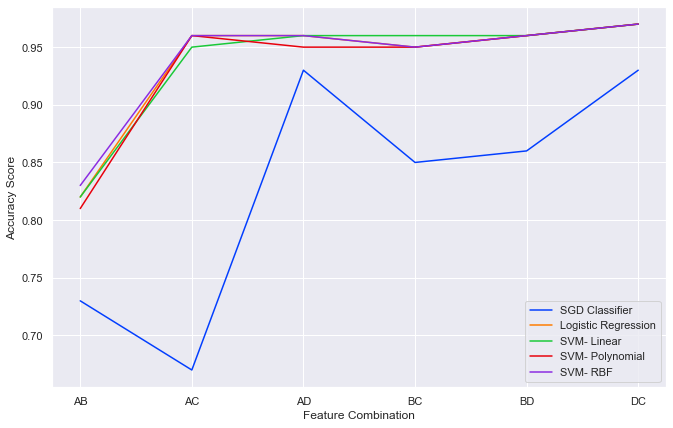

In [69]:
sns.set(rc={'figure.figsize':(11,7)})
sns.set_palette("bright")
df_30_info_temp = df_30_info
df_30_info_temp = df_30_info.drop('Model Type', axis=1)
labels= ["SGD Classifier", "Logistic Regression", "SVM- Linear", "SVM- Polynomial", "SVM- RBF"]
x_dat = ['AB', 'AC', 'AD', 'BC', 'BD', 'DC']

for i in range(len(labels)):
    y_dat = list(df_30_info_temp.iloc[i])
    ax = sns.lineplot(x=x_dat, y=y_dat, label=labels[i])

ax.set_xlabel("Feature Combination")
ax.set_ylabel("Accuracy Score")

### Mean Accuracy Among different Models: 

In [70]:
df_30_info['Mean_Model'] = round(df_30_info.mean(axis=1, numeric_only=True),2)
df_30_info[['Model Type', 'Mean_Model']]

,Model Type,Mean_Model
0,SGD Classifier,0.83
1,Logistic Regression,0.94
2,SVM- Linear,0.94
3,SVM- Polynomial,0.93
4,SVM- RBF,0.94


### SVM vs SGD Classifier

##### Let us compare the result between SGD and SVM as they had the least and the best accuracy scores:
For all feature combinations, SVM performed better than SGD classifier. One of the distinctions between them is that SVM tries to find the "optimal" margin that maximizes the distance between the margin line and support vectors that separates the classes. While SGD tries to find the best line that splits the data points accurately, and the line is closer to the optimal points.

One of the reasons that I think SGD didn't perform well is because, while calculating the loss in each step, by default it chooses a small subset of points instead of the entire dataset. For large datasets, that might be a great choice for efficiency, but for smaller datasets, it may skew the calculation, and end up with the worst model. It is also worth to note that, when I changed the default value of eta0 from 0 to 0.01 and learning_rate to optimal, the SGD model had a slight improvement in accuracy. And changing max iterations from default=1000, to 2000 or more didn't have an effect on the accuracy score.


### Tweaking Gamma in RBF: 

In [71]:
X_train = df[['sepal_length_(cm)', 'sepal_width_(cm)']] 
y_train = df['class']

def train_SVM_rbf(X_train, y_train, sel_kernel,g):
    SVM_model = SVC(kernel=sel_kernel, random_state=30, gamma=g)
    SVM_model.fit(X_train, y_train)
    accuracy = round(SVM_model.score(X_train, y_train),2)
    print(f"For Gamma={g}, accuracy is {accuracy}")

gamma = [1,2,4,6,7]

for g in gamma:
    train_SVM_rbf(X_train, y_train, 'rbf', g*3.5)

For Gamma=3.5, accuracy is 0.83
For Gamma=7.0, accuracy is 0.83
For Gamma=14.0, accuracy is 0.85
For Gamma=21.0, accuracy is 0.86
For Gamma=24.5, accuracy is 0.87


Since, 'sepal_length_(cm)', 'sepal_width_(cm) had the worst model outcome, I tried changing the default values of Gamma in  radial basis function (RBF) to see if I got any better result. From the above observation, we can see that, with higher gamma values, the accuracy score got improved. I think this is because a larger \gamma γ(gamma) gives a narrower region, which means a stricter fit. And a smaller γ(gamma) means a broader region, which means a loose fit on the dataset. However, even though the score is good for this dataset, this introduces a big problem. The equation for gamma in RBF is: 

$$ \gamma = \frac{1}{2 \sigma} $$
Here, the $ \sigma $ is the standard deviation the controls the amount of variation. That means higher $ \gamma $ implies small variance allowed, that leads to a tight or exact fit on the tranning samples, which may lead to overfitting. On the other side, smaller $ \gamma $ means high varience, and loose fit, that might lead to underfitting. 

### Mean accuracy among features: 

In [72]:
info = ["Mean_features"]
info.extend(list(round(df_30_info[df_30_info.columns[1:]].mean(),2)))
df_30_info.loc[len(df_30_info)] = info

df_30_info[['Model Type','AB','AC', 'AD','BC', 'BD','CD']]

,Model Type,AB,AC,AD,BC,BD,CD
0,SGD Classifier,0.73,0.67,0.93,0.85,0.86,0.93
1,Logistic Regression,0.82,0.96,0.96,0.95,0.96,0.97
2,SVM- Linear,0.82,0.95,0.96,0.96,0.96,0.97
3,SVM- Polynomial,0.81,0.96,0.95,0.95,0.96,0.97
4,SVM- RBF,0.83,0.96,0.96,0.95,0.96,0.97
5,Mean_features,0.80,0.90,0.95,0.93,0.94,0.96


From the table above we can see that features AB(Sepal length + width) gave us the worst model for all 5 classification models. We will vizualize their relationship in the graph below. 

On the other hand, models with features CD(Petal length + width) performed the best for all of the classification models.

# Drawing Margin:

In [73]:
def draw(model, types, features):
    X_train = df[features]
    y = df['class']

    def make_meshgrid(x, y, h=.02):
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        return xx, yy

    def plot_contours(ax, clf, xx, yy, **params):
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
        return out

    # Set-up grid for plotting.
    X0, X1 = X_train[features[0]], X_train[features[1]]
    xx, yy = make_meshgrid(X0, X1)
    clf = model.fit(X_train, y_train)

    fig, ax = plt.subplots()
    # title for the plots
    title = (f'Decision surface of {types} SVC')

    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

    ax.set_ylabel(features[0])
    ax.set_xlabel(features[1])
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

    plt.show()
    
    #Cite: The above code is adapted from Scikit Learn SVM site: https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html

### Linear Kernel with Sepal length + width features: (Worst Model)

C:\Users\dip2l\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


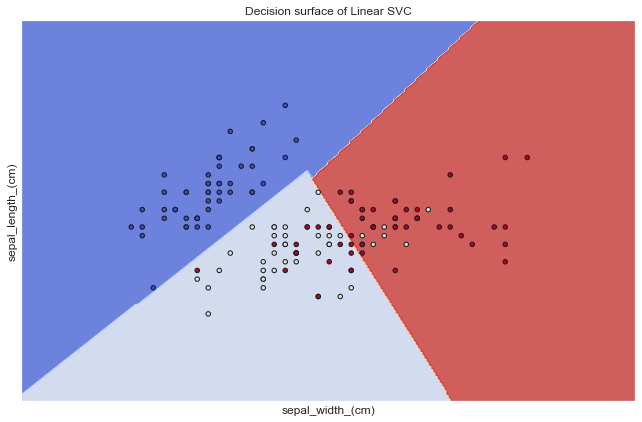

In [74]:
features = ['sepal_length_(cm)', 'sepal_width_(cm)']
draw(SVC(kernel='linear'), "Linear", features)

In the above graph, we can vizualize the desicion margin that SVM with linear kernal used to make the prediction model. From the accuracy table, we have seen that the combination of Sepal length and sepal width gave the worst prediction model. From the above graph we can see the data points are not easily separable and have a lot of overlap between red and white points. Hence the desicion margin is also comparativelty less accurate than using other features. 

### Linear Kernel with Petal length + width features: (Best Model)

C:\Users\dip2l\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


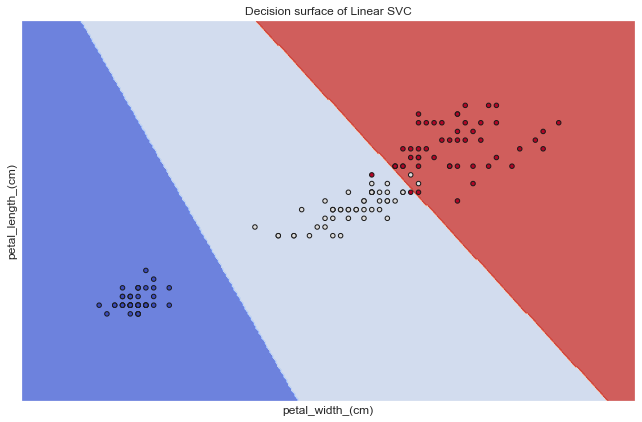

In [75]:
features = ['petal_length_(cm)', 'petal_width_(cm)']
draw(SVC(kernel='linear'), "Linear", features)

From the points in the above graph, it is pretty intuitive that petal length and width are fairly distinct for each of the 3 Iris species. Hence our linear SVM model came up with a pretty good decision boundary without any overlap between classes(except for 2 points).

### Poly kernel w/ Degrees for worst model

C:\Users\dip2l\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


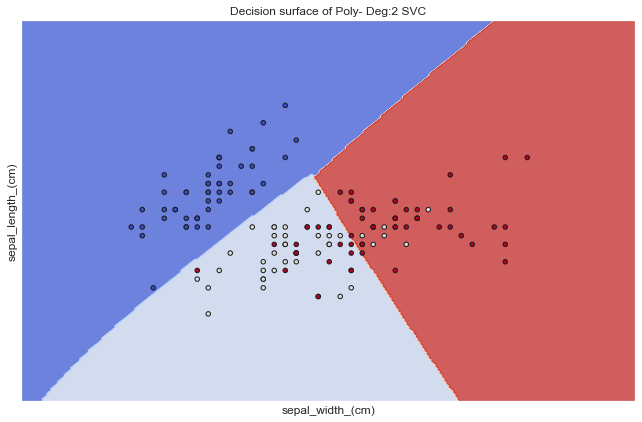

C:\Users\dip2l\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


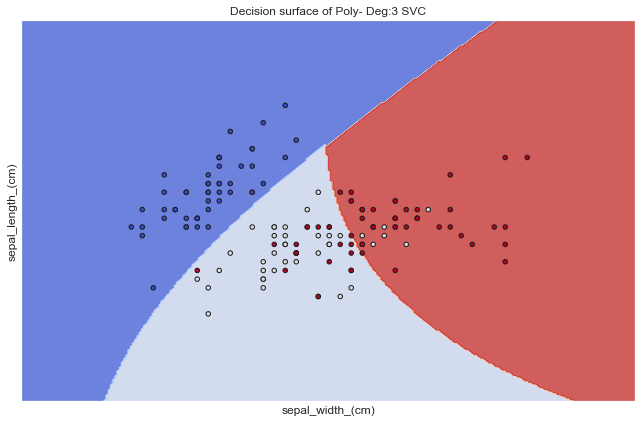

C:\Users\dip2l\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


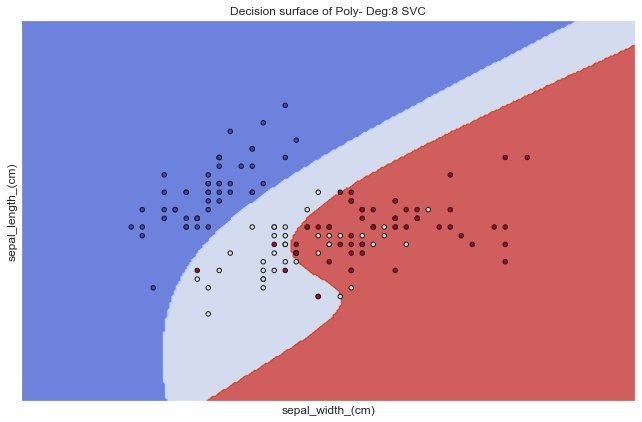

In [76]:
features = ['sepal_length_(cm)', 'sepal_width_(cm)']

#Poly Degree: 2 
draw(SVC(kernel='poly', degree=2),"Poly- Deg:2", features)

#Poly Degree: 3
draw(SVC(kernel='poly', degree=3), "Poly- Deg:3",features)

#Poly Degree: 8 
draw(SVC(kernel='poly', degree=8), "Poly- Deg:8",features)


I made the above graph to vizualize the how SVM came up with the decision bouederies for the worst model with sepal length and width. As we can see, with larger degrees, the SVM tries to come a hyperplanne by transforming the dataset, so that the transformed dataset is linearly separable. Although, by having a higer degree(deg=8), we have a **very different** decision boundery(last graph above) compare to degree-2/3, but these two features are still pretty bad for predicting Iris flower class.

[Back to SVM](#SVM)

In [983]:
#==============================================